In [2]:
import os
import sys
import math
import numpy as np

import matplotlib.pyplot as plt

import cv2 as cv
from scipy import interpolate
from scipy.signal import convolve2d
from scipy.ndimage import percentile_filter
from sklearn.preprocessing import MinMaxScaler

sys.path.append("../scripts/")

from oct2l import OCT2Layer

oct2l = OCT2Layer()

ovol = oct2l.Load("../data/npy/ODD_079_OD.npy")
cvol = oct2l.Preprocess(ovol)
ilm = oct2l.Segment_ilm(cvol)
rpe = oct2l.Segment_rpe(cvol, ilm)


ValueError: could not broadcast input array from shape (99,) into shape (100,)

In [36]:
this_k = ovol[k,:,:]
this_s = surf[k,:]
K = 97
M = 768

vol2 = np.zeros((K, 100, M))  # 100 rows. 


for k in range(K):
    for m in range(M):

        i0 = int(surf[k,m]) + 50  # starting index for the search
        
        ovol[k, i0:i0+100, :]

        
        
        vol2[k,:,:] = ovol[k, mi:mi+100, :]



plt.imshow(vol2[k,:,:])



ValueError: could not broadcast input array from shape (99,768) into shape (100,768)

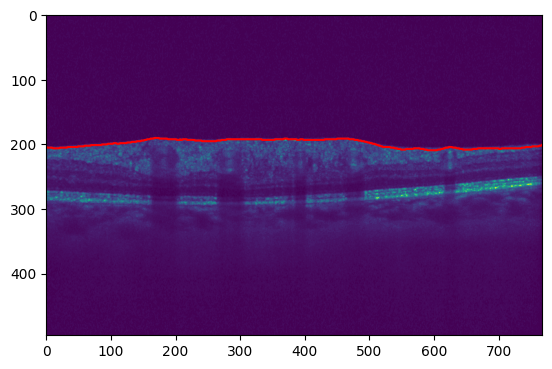

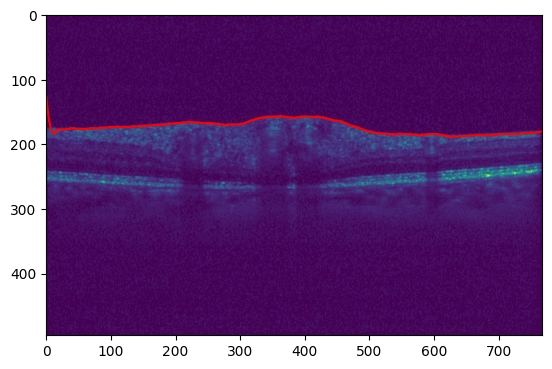

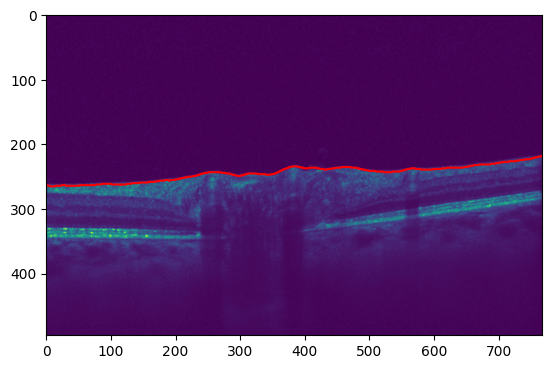

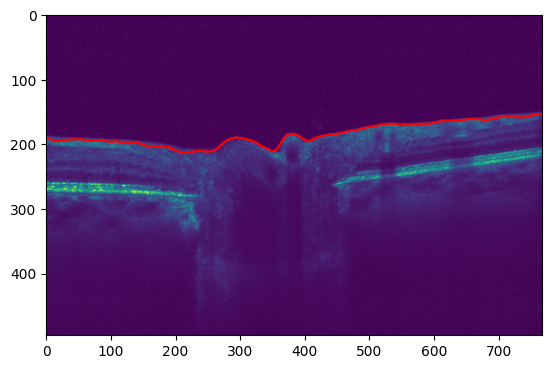

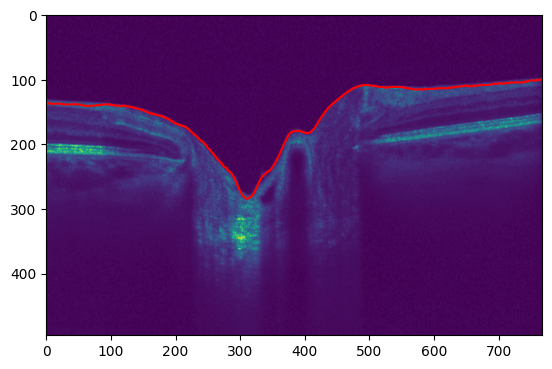

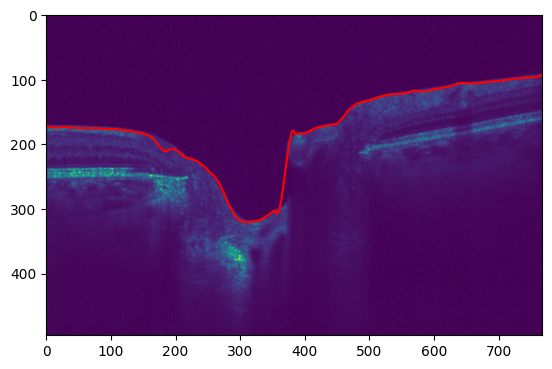

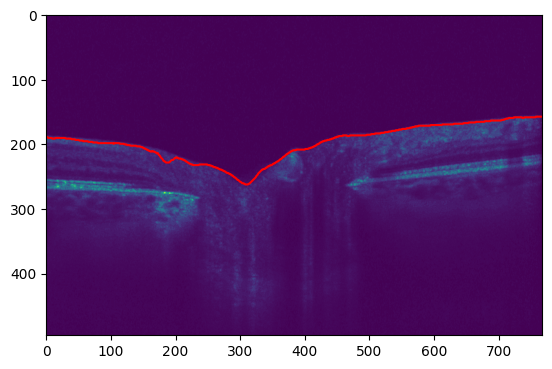

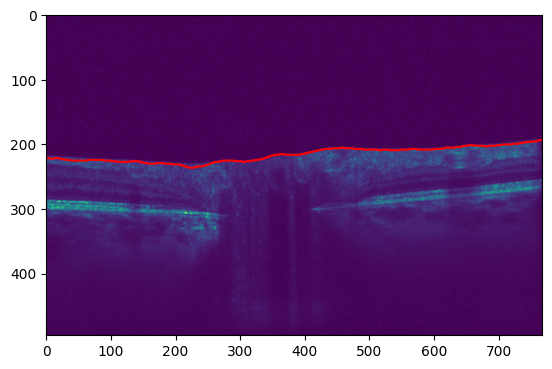

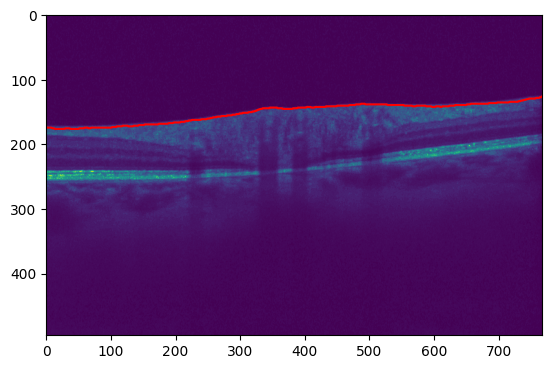

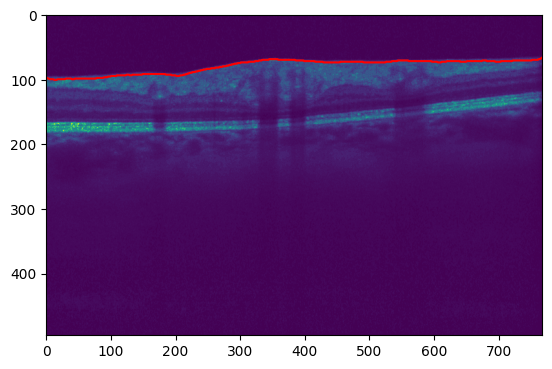

In [3]:
for k in np.arange(0,97,10):
    plt.figure()
    plt.imshow(ovol[k,:,:])
    plt.plot(surf[k,:], color='r')

In [27]:
class Segment():

    def __init__(self, x, y):
        pass

    def ILM(self):
        print('this is ILM')
    
    def RPE(self):
        print('this is RPE')


segment = Segment(1,2)
segment.RPE()
segment.ILM()
    
class TestClass():

    def __init__(self, x, y):

        segment = Segment(1,2)

    
    



this is RPE
this is ILM


In [20]:
variance = np.diff(surf[k,:]) # difference between each point
threshold = np.percentile(abs(variance), 95)


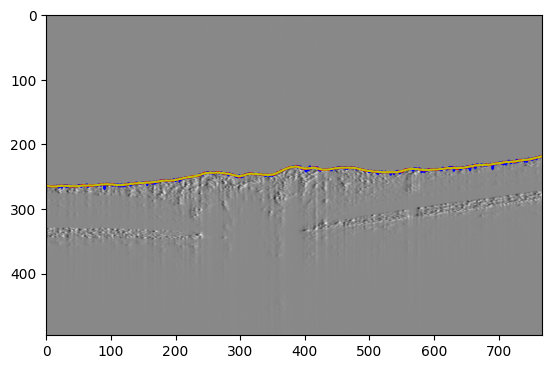

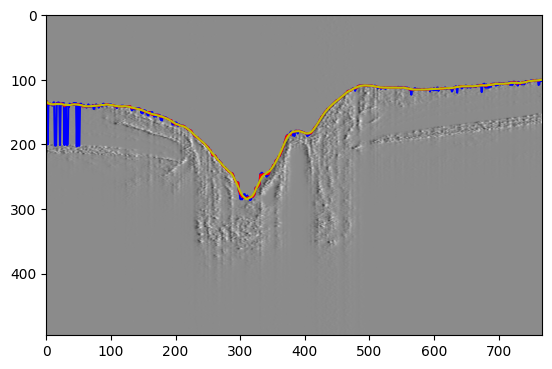

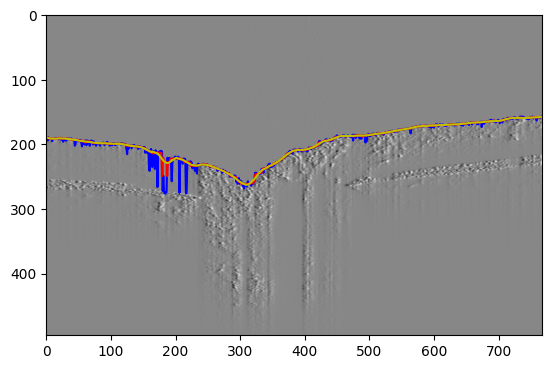

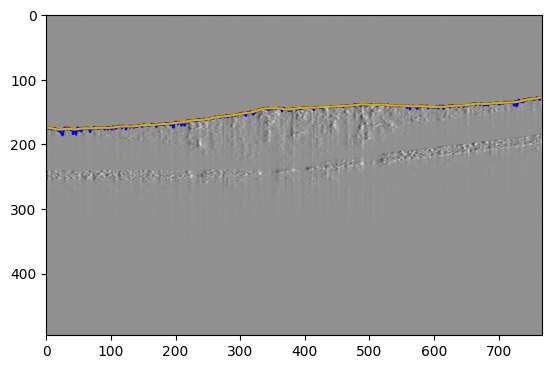

In [23]:
from scipy.signal import medfilt, savgol_filter

for k in [20,40,60,80]:

    s1 = surf[k,:]
    s2 = medfilt(s1, 15)
    s3 = savgol_filter(s2, 31, 3)

    plt.figure()
    plt.imshow(cvol[k,:,:], 'binary')
    plt.plot(s1, 'b')
    plt.plot(s2, 'r')
    plt.plot(s3, 'y')


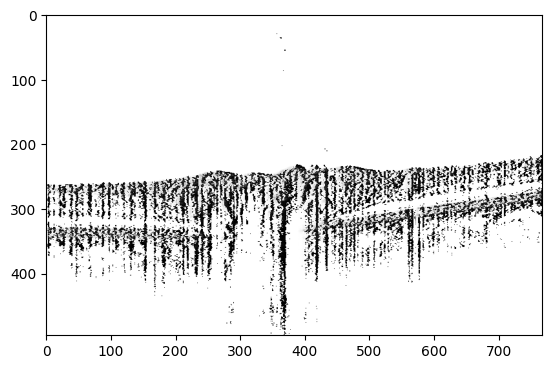

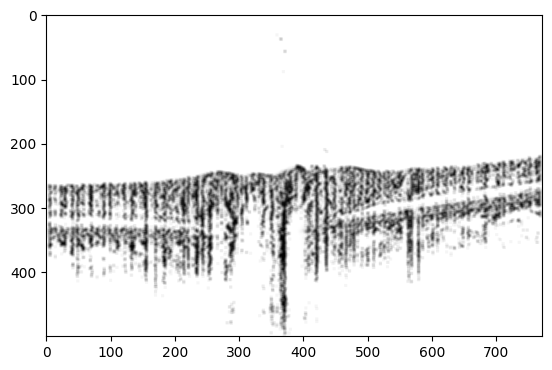

In [8]:
x = np.uint8(cvol)[20,:,:]
plt.imshow(x, "binary")

xg = convolve2d(x, (1/25)*np.ones((5,5)))

plt.figure()
plt.imshow(xg, "binary")

In [13]:
# real-world distance (microns) between each point along k,n,m dimensions
k_micron = 30
n_micron = 3.8
m_micron = 6

# vertical edge finding kernel 
kernel = np.array([
    [-1, 2, -1],
    [ 0, 0, 0],
    [ 1, 2, 1]])

vol = np.load("../data/npy/ODD_079_OD.npy")
K, M, N = vol.shape

surface = np.zeros((K, M))
stds = []